![baptiste-merel-x69j7cTtiwg-unsplash](baptiste-merel-x69j7cTtiwg-unsplash.jpg)
image credit: baptiste merel, unsplash

# Which songs are most suitable for a dancing party?

## 📖 Background
It's that vibrant time of year again - Summer has arrived (for those of us in the Northern Hemisphere at least)! There's an energy in the air that inspires us to get up and move. In sync with this exuberance, your company has decided to host a dance party to celebrate. And you, with your unique blend of creativity and analytical expertise, have been entrusted with the crucial task of curating a dance-themed playlist that will set the perfect mood for this electrifying night. The question then arises - How can you identify the songs that would make the attendees dance their hearts out? This is where your coding skills come into play.

## 💾 The Data
You have assembled information on more than `125` genres of Spotify music tracks in a file called `spotify.csv`, with each genre containing approximately `1000` tracks. All tracks, from all time, have been taken into account without any time period limitations. However, the data collection was concluded in `October 2022`.
Each row represents a track that has some audio features associated with it.

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_ms` | The length of the track, measured in milliseconds.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` | A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy.|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.| 
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.| 
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.| 
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|

[Source](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) (data has been modified)

# Abstract
A quality of a good part heavily depends on the quality of the music. It's not an easy job picking a playlist for a party. it's hard to be unbaised and create a list by personal knowledge/preferences. In this analysis, the dataset is carefully inspected with various methods in data cleaning, visualziation and statsics, a model was builed to give danceabiltiy score with high accuracy, and finally a recommended playlist based the model's prediction. In each section list below, provided details walk through of the analysis and at the last section, a recommendation playlist awaits!   
- Section 1: data validation 
- Section 2: Audio Feature Exploration
- Section 3: build a machine learn model 
- Section 4: create a recommendation list 

In [54]:
import pandas as pd
spotify = pd.read_csv('data/spotify.csv')
spotify

track_id  ...  track_genre
0       5SuOikwiRyPMVoIQDJUgSV  ...     acoustic
1       4qPNDBW1i3p13qLCt0Ki3A  ...     acoustic
2       1iJBSr7s7jYXzM8EGcbK5b  ...     acoustic
3       6lfxq3CG4xtTiEg7opyCyx  ...     acoustic
4       5vjLSffimiIP26QG5WcN2K  ...     acoustic
...                        ...  ...          ...
113022  2C3TZjDRiAzdyViavDJ217  ...  world-music
113023  1hIz5L4IB9hN3WRYPOCGPw  ...  world-music
113024  6x8ZfSoqDjuNa5SVP5QjvX  ...  world-music
113025  2e6sXL2bYv4bSz6VTdnfLs  ...  world-music
113026  2hETkH7cOfqmz3LqZDHZf5  ...  world-music

[113027 rows x 20 columns]

In [55]:
#import key packages for the project 
import numpy as np
import pandas as pd 
import seaborn as sns 
import missingno as msno
import matplotlib.pyplot as plt
import pingouin

# Section 1 Data Validation: 
Before dive into data exploration, dataset needs inspection and cleaning to ensure data integrity. 
the quality of downstream analysis, machine learning model and ultimatley playlist quality heavily depends on this step. 

after import, the dataset was inspected in following 4 common areas where common data issue can occur: 
- data type correctness
- missing data
- out of range issue 
- duplications

**below**, listed detials decription of steps and actions taken regarading each area. 

## Issue 1: Data type constrains 
checked each feature(column)'s data type against the information of each features in the table provied above. 
column: key, mode, time_signature contain numerican input, but each represent a category.

**Action**: 
- change column key, mode, time_signature from type int64 to type cateogry 

**note** track_genre column's data type should be category rather than object. since this column will be removed (explination in later section)and rest of the column has no data type issues observed; therefore, no action is needed here. 

## Issue 2: Missing Values
- artistis: 49 total missing values:  1 null value , 48 of #NAME? 
- album_name: 5 total missing values:  1 null value, 4 of #NAME? 
- track_name: 6 total missing values: 1 null value,  5 of #NAME?

**Action**: deletion
- convert missing values to np.nan
- used dropna() dropped all missing values.  
 
## Issue 3: Out of range 
- duration_ms: 1 observation have 0 duration as input
- tempo: 157 observations have 0 tempo as input
- time_signature: 163 observations with 0 time sigatures as input
**reasoning**: based on addtional research, music regardless genre, will contain some values of tempo and time signature;therfore, conclude observations with 0 both or either tempo and time signature are out of range 

**Action**: deletion 
- although common method would include imputation, but in this case, impution would be difficulte due the the large variablity within in each genre 
- convert out of range values to np.nan
- used dropna() dropped all missing values 

## Issue 4: Duplication 
while checking for duplicates. couple situations occured 
situation 1: complete duplicates 
- all features match 
situation 2: incomplete duplicates 
a. match in all fiels expect in only track_genre
b. different in one or multiple numeric features 


**Action**: 
1. removed the complete duplicates 
2. drop the track genre column - the track genre column has 114 unique values (see analysis in addtional section). some genres can be grouped into under one umbrella genre. some genres are mixture of others. there is no clear cut between genres. even with simplfing genres, the number of unique values still will be way too much which might lead to complications to downstream analysis. 
3. removed incomplete duplicates, and use imputation as the final input. 

unrealted to data cleaning: track_id and album_name columns are removed as well. 
- those columns are less relevant to downstream analysis and creating the playlist. 
after all the cleaning steps, the new shpae of the dataset (89461, 17), is 20% less than the raw dataset. 

In [56]:
print(spotify.shape)

(113027, 20)


In [57]:
#check raw dataset's columns, datatype, and missign values 
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113027 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113027 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113027 non-null  int64  
 5   duration_ms       113027 non-null  float64
 6   explicit          113027 non-null  bool   
 7   danceability      113027 non-null  float64
 8   energy            113027 non-null  float64
 9   key               113027 non-null  int64  
 10  loudness          113027 non-null  float64
 11  mode              113027 non-null  int64  
 12  speechiness       113027 non-null  float64
 13  acousticness      113027 non-null  float64
 14  instrumentalness  113027 non-null  float64
 15  liveness          113027 non-null  float64
 16  valence           11

In [58]:
#using summary statistics to inspect numeric columns 
spotify.describe()

popularity   duration_ms  ...          tempo  time_signature
count  113027.000000  1.130270e+05  ...  113027.000000   113027.000000
mean       33.274386  2.281997e+05  ...     122.267773        3.929035
std        22.322053  1.070011e+05  ...      29.961328        0.339922
min         0.000000  0.000000e+00  ...       0.000000        0.000000
25%        17.000000  1.743575e+05  ...      99.559500        4.000000
50%        35.000000  2.130530e+05  ...     122.043000        4.000000
75%        50.000000  2.615620e+05  ...     140.093000        4.000000
max       100.000000  5.237295e+06  ...     243.372000        5.000000

[8 rows x 14 columns]

In [59]:
column_names = ['key','mode','explicit','time_signature']
for col in column_names:
    spotify[col]=spotify[col].astype('category')

In [60]:
#covert missing values to NAN
spotify.replace(to_replace='#NAME?',value=np.nan, inplace=True)
spotify.replace(to_replace='null',value=np.nan, inplace=True)
#convert out of range values to NAN
spotify.loc[spotify['duration_ms']==0, 'duration_ms'] = np.nan
spotify.loc[spotify['tempo']==0, 'tempo'] = np.nan
spotify.loc[spotify['time_signature']==0, 'time_signature'] = np.nan

In [61]:
#display the amount of missing values in each column
print(spotify.isnull().sum())

track_id              0
artists              49
album_name            5
track_name            6
popularity            0
duration_ms           1
explicit              0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo               157
time_signature      163
track_genre           0
dtype: int64


In [62]:
#remove all missing values and saved as a new dataframe  
spotify_clean = spotify.dropna()

In [63]:
#inspect whether all missing values are removed
print(spotify_clean.isna().sum())
#no missing values remain

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [64]:
#drop track_id, album_name, track genre columns in the dataset 
spotify_clean.drop(['track_id','album_name','track_genre'], axis=1, inplace=True)

In [65]:
#check for complete duplication in the dataset 
spotify_clean[spotify_clean.duplicated()]

artists  ... time_signature
28                                      Jason Mraz  ...              4
29                                      Jason Mraz  ...              4
30                                      Jason Mraz  ...              4
31                                      Jason Mraz  ...              4
34                        Brandi Carlile;Sam Smith  ...              4
...                                            ...  ...            ...
112650     Bethel Music;Brian Johnson;Jenn Johnson  ...              4
112672            Bethel Music;Steffany Gretzinger  ...              4
112675  Hillsong Worship;Benjamin William Hastings  ...              4
112816            Chris Tomlin;Steffany Gretzinger  ...              4
112910                       Bryan & Katie Torwalt  ...              4

[27086 rows x 17 columns]

In [66]:
#drop complete durplicates
spotify_clean.drop_duplicates(inplace=True)

In [67]:
#check duplication 
print(spotify_clean.duplicated().sum())

0


In [68]:
#check again for incomplete duplicates
spotify_clean[spotify_clean.duplicated(subset=['artists','track_name'])]

artists  ... time_signature
18                 Jason Mraz;Colbie Caillat  ...              4
20                                Jason Mraz  ...              4
22      A Great Big World;Christina Aguilera  ...              3
75                                Jason Mraz  ...              4
117                               Jason Mraz  ...              3
...                                      ...  ...            ...
112872                          Chris Tomlin  ...              4
112873    Hillsong Worship;Brooke Ligertwood  ...              4
112944       Hillsong Worship;Mi-kaisha Rose  ...              4
112978             Passion;Kristian Stanfill  ...              3
113018                          Chris Tomlin  ...              4

[5337 rows x 17 columns]

In [69]:
#remove incomplete duplicates 
column_names = ['artists','track_name']
summaries = {'popularity':'mean', 'duration_ms':'mean','explicit':'first', 'danceability':'mean',     'energy':'mean', 'key':'first','loudness':'mean','mode':'first', 'speechiness':'mean','acousticness':'mean', 'instrumentalness':'mean', 'liveness':'mean', 'valence' :'mean', 'tempo' :'mean', 'time_signature':'first'}
spotify_clean=spotify_clean.groupby(by=column_names).agg(summaries).reset_index()

In [70]:
#check 1: spot check for incomplete duplicates
spotify_clean[spotify_clean['track_name']=='Under The Influence']

artists           track_name  ...    tempo  time_signature
13487            Chris Brown  Under The Influence  ...  116.992               4
68911  The Chemical Brothers  Under The Influence  ...  134.963               4

[2 rows x 17 columns]

In [71]:
#check 2 : see there is any incomplete duplicates 
spotify_clean[spotify_clean.duplicated(subset=['artists','track_name'])]

Empty DataFrame
Columns: [artists, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature]
Index: []

In [72]:
#inspect the cleaned data frame 
spotify_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80392 entries, 0 to 80391
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   artists           80392 non-null  object  
 1   track_name        80392 non-null  object  
 2   popularity        80392 non-null  float64 
 3   duration_ms       80392 non-null  float64 
 4   explicit          80392 non-null  category
 5   danceability      80392 non-null  float64 
 6   energy            80392 non-null  float64 
 7   key               80392 non-null  category
 8   loudness          80392 non-null  float64 
 9   mode              80392 non-null  category
 10  speechiness       80392 non-null  float64 
 11  acousticness      80392 non-null  float64 
 12  instrumentalness  80392 non-null  float64 
 13  liveness          80392 non-null  float64 
 14  valence           80392 non-null  float64 
 15  tempo             80392 non-null  float64 
 16  time_signature    8039

In [73]:
#check final shape of the dataframe after cleaning 
print(spotify_clean.shape)

(80392, 17)


In [74]:
spotify_clean=spotify_clean.reset_index()

# Section 2: Exploratory Analysis
**Create Categorical Features**:
used the median as a cutoff point. I created addtional category variables: dance_category, pop_category, and energy_cateogry that indicated whether a track is high or low in danceability, popularity, and energy. 
with those addtional variables, it will be easier to exam the relationship between different track features. 

### Part 1: Explore Relationship between audio features 
**Calculate the correlations and graph the correlction matrix as heatmap** 
this method is used to have a glace of strenght of the linear realtionship between features. as the figure 1 shows, most features do not have a linear relationship. but few features shows moderate to strong positive or negative relationship. those are the following: 
- **danceability** & **valence**: moderate, positive (0.48)
- **danceability** & **loudness**: weak, positive (0.24) 
- **energy** & **loudness**: strong, positive (0.76)
- **energy** & **acousticness**: strong, negative (-0.73)
- **loudness** & **intrumentalness**: moderate, negative (-0.43)
- **loudness** & **acousticness**: moderate, negative (-0.58)
- **instrumentalness** & **valence**: moderate, negative (-0.33)

**_Note_**: the stregnth of the relationships are assessed based on the correlation calculate in **Table 1** and metric in **Table 2**. 

features show strong positive or negative linear relationships are explored below in individual plots. 
figure 4:  the relationship between loudness and energy is acturally not linear. the relationship grows initially, but platueaed.  

since the goals of the analysis is find track that is suitable for a company dance party, the danceability will the heavy focus which lead to the part 2 of this section. 

### Part 2: Deep Dive of Song Danceability
some reltionships might not be linear, but still provide insights as to what characteristics do high danceabilty songs have. this is the focus of this part. 
using statics, create dancedability cateogry 1,2,3 means low, medium and high 3 levels. 
compare the following features between the 3 levels:
1. popularity
2. valence 
3. energy
4. tempo
5. loudness
6. time signature 
7. mode 

reasons for such extensive analysis:
1. using above features to understand what makes tracks recieved higher danceability
2. for final playlist, besdies prediect danceability score by the model. it also helpful to have addtional features in addiition to filter the list. 

conclusion of part 2:
diffrence beteewn danceability levels are statiscally significant (used pairedwise test) in features popularity, valence, energy, tempo. and diffrence loudness, time signature, mode are not. 
popularity, valence, energy, and tempo can be used to filter the final list. 

In [75]:
#create danceability category 
#create the boundary for each cateogry
dance_twenty_fifth = spotify_clean['danceability'].quantile(0.25)
dance_median = spotify_clean['danceability'].median()
dance_seventy_fifth = spotify_clean['danceability'].quantile(0.75)
dance_maximum = spotify_clean['danceability'].max()

#create the bins which pd.cut() will use to map each observation to a cateogry 
dance_bins=[0, dance_median, dance_seventy_fifth, dance_maximum]  #dance_seventy_fifth,

#create the labels for each category
dance_labels=[1,2,3]

#create the dance category column 
spotify_clean['dance_category']=pd.cut(spotify_clean['danceability'], labels= dance_labels, bins = dance_bins, include_lowest=True)

#ensure the mapping is correct
spotify_clean.head()

index                artists  ... time_signature  dance_category
0      0                 !nvite  ...              4               3
1      1                 !nvite  ...              4               3
2      2  "Puppy Dog Pals" Cast  ...              3               2
3      3  "Puppy Dog Pals" Cast  ...              4               3
4      4    "Weird Al" Yankovic  ...              4               3

[5 rows x 19 columns]

### Explore Audio Features of the dataset

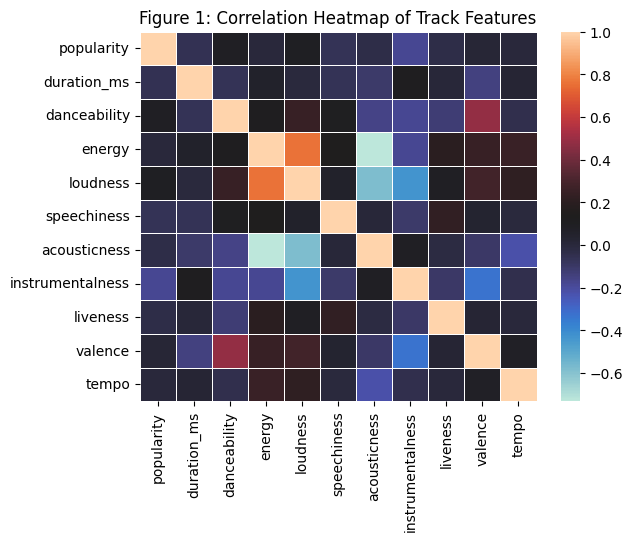

In [76]:
spotify_clean_num= spotify_clean.drop(['artists','track_name','index'], axis = 1)
sns.heatmap(spotify_clean_num.corr(), cmap='icefire', linewidths=0.5)
plt.title('Figure 1: Correlation Heatmap of Track Features');

**Figure 1**: heatmap of corrleations between features 
figure shows the strenght of correlations (in colors) between features. at glace, between many features there is no correlation; however, some correlations are moderate to strong (positive or negative)between following track features:
- **danceability** & **valence**: moderate, positive 
- **danceability** & **loudness**: weak, positive  
- **energy** & **loudness**: strong, positive 
- **energy** & **acousticness**: strong, negative 
- **loudness** & **intrumentalness**: moderate, negative 
- **loudness** & **acousticness**: moderate, negative
- **instrumentalness** & **valence**: moderate, negative
 
_Correlation trength and the direction listed above is concluded based the calculate in **Table 1** and Interpretation Metric in **Table 2**_

In [77]:
spotify_clean_num.corr()

popularity  duration_ms  ...   valence     tempo
popularity          1.000000    -0.056396  ...  0.012826  0.000714
duration_ms        -0.056396     1.000000  ... -0.146601  0.020470
danceability        0.089627    -0.066130  ...  0.484647 -0.043072
energy              0.000874     0.057941  ...  0.247552  0.249932
loudness            0.096843    -0.003817  ...  0.280716  0.218922
speechiness        -0.065623    -0.063095  ...  0.033278 -0.006684
acousticness       -0.033560    -0.106193  ... -0.096805 -0.221016
instrumentalness   -0.181843     0.115551  ... -0.327575 -0.048284
liveness           -0.030244     0.008999  ...  0.019210  0.000504
valence             0.012826    -0.146601  ...  1.000000  0.079443
tempo               0.000714     0.020470  ...  0.079443  1.000000

[11 rows x 11 columns]

**Table 1**: Correlation Matrix

Table shows the numeric values of correlations between track features. the strenght of correlation and the direction (positive or negative) are determined by the calculation result in this table. 

![Screenshot 2023-09-23 at 12.14.22 PM](Screenshot%202023-09-23%20at%2012.14.22%20PM.png)

**Table 2**: Correlation Interpretation Metric 
sorce:[paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/)


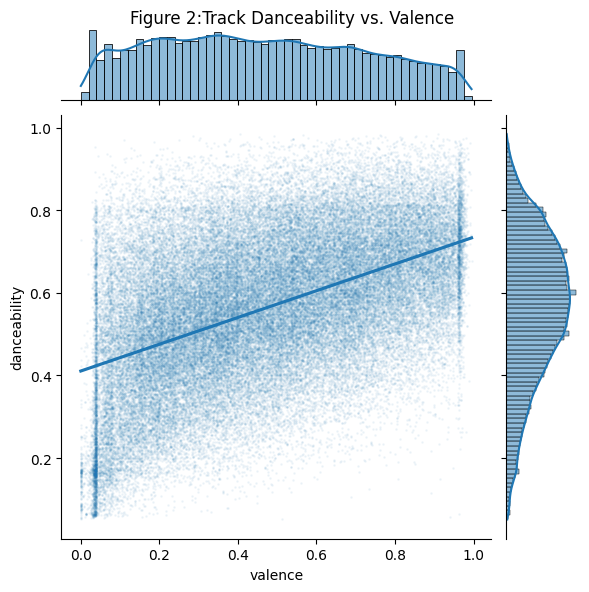

In [78]:
g = sns.jointplot(x='valence', y="danceability",data=spotify_clean, kind='reg', scatter_kws={'alpha':0.05,'s':1})
g.fig.suptitle('Figure 2:Track Danceability vs. Valence ')
g.fig.subplots_adjust(top=0.95);

**Figure 2**: Track Valence vs Dancebility 

The Figure shows moderate linear positive relationship between valence and danceability. although the data spread quite around the regression line, but in general a positive linear relationsihp can be observed here. 

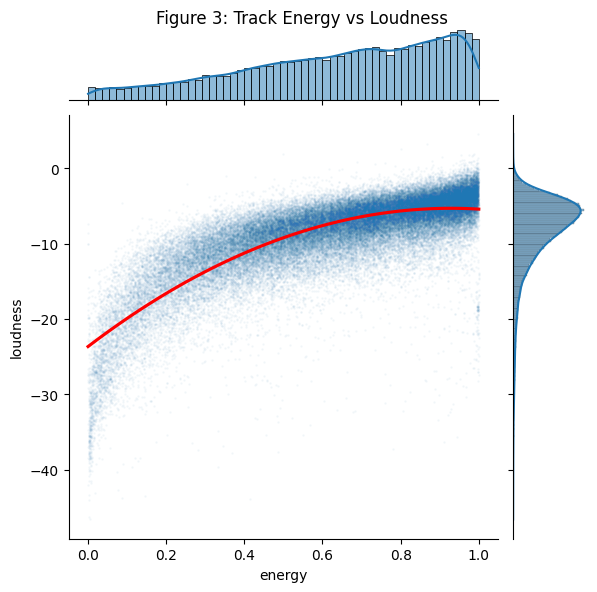

In [79]:
g = sns.jointplot( x='energy', y="loudness", data=spotify_clean, kind='reg', scatter_kws={'alpha':0.03,'s':1}, order=2, line_kws={'color':'red'})
g.fig.suptitle('Figure 3: Track Energy vs Loudness')
g.fig.subplots_adjust(top=0.95);

**Figure 3**: Track energy vs loudness

The heatmap indicate a strong linear relationship between energy and loudness, suggest the increase of one feature lead the to the increase of another grow proportionally, but in this graph shows the growth is non linear and shows signs plateauness as the energy reach to 1. this graph shows that large amount of tracks in this dataset is are high in density and loudness (the close it is to 0, the louder it is)

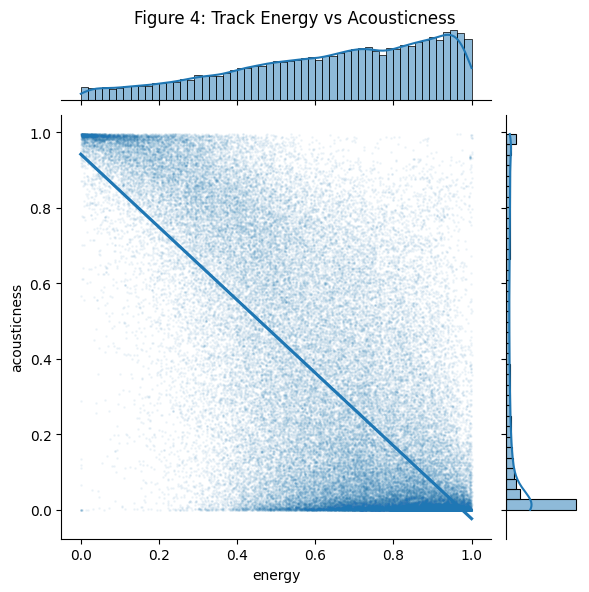

In [80]:
g = sns.jointplot( x='energy', y='acousticness',data=spotify_clean, kind='reg',order=1, scatter_kws={'alpha':0.05,'s':1})
g.fig.suptitle('Figure 4: Track Energy vs Acousticness')
g.fig.subplots_adjust(top=0.95);

**Figure 4:** Track Energy vs Acousticness 

The graph shows the relationship between track energy and acousticness is linearly neagtive. as one increase, the other proportionally decrease, but the grow plateaued at 1 in both features. 

### Deep Dive of Song's Danceability 

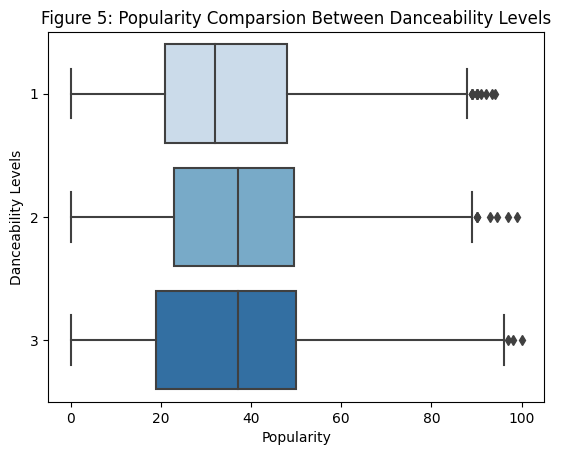

In [81]:
sns.boxplot(x='popularity',y='dance_category', data=spotify_clean, palette="Blues")
plt.xlabel('Popularity')
plt.ylabel('Danceability Levels')
plt.title('Figure 5: Popularity Comparsion Between Danceability Levels');

**Figure 5**: Popularity distribtion between Danceability Levels
this boxen plots shows the distribuiton of popularity between groups. 

In [82]:
#mean popularity of each danceability level 
spotify_clean.groupby(by='dance_category')['popularity'].mean()

dance_category
1    33.605651
2    36.373625
3    35.361951
Name: popularity, dtype: float64

In [83]:
#using pairwise tests to comparesion between groups with adjustments 
pingouin.pairwise_tests(data=spotify_clean, dv='popularity', between='dance_category', padjust='bonf')

Contrast  A  B  Paired  ...        p-corr  p-adjust       BF10    hedges
0  dance_category  1  2   False  ...  3.738236e-66      bonf  4.195e+62 -0.149577
1  dance_category  1  3   False  ...  2.224923e-24      bonf  1.025e+21 -0.091890
2  dance_category  2  3   False  ...  5.875582e-07      bonf   8490.916  0.051995

[3 rows x 13 columns]

**Table 3**: Pairwise Test of popularity between Danceability levels 

compare to the alpha level at 0.2 the difference in popularity between group is stastically significant.group 2(medium danceabiliy) has he highest popularity between all 3 gorups. 

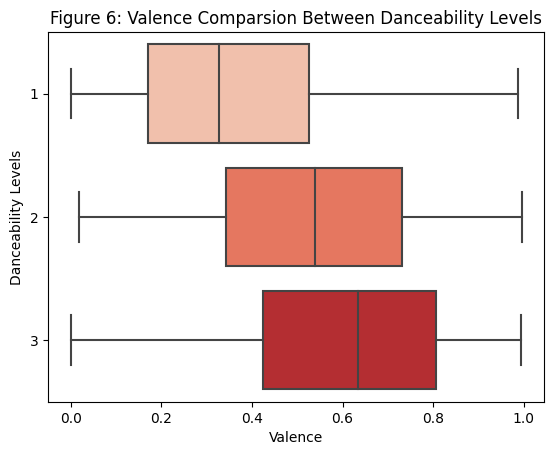

In [84]:
sns.boxplot(x='valence',y='dance_category',data=spotify_clean,palette="Reds")
plt.xlabel('Valence')
plt.ylabel('Danceability Levels')
plt.title('Figure 6: Valence Comparsion Between Danceability Levels');

In [85]:
#mean valence of each level 
spotify_clean.groupby(by='dance_category')['valence'].mean()

dance_category
1    0.362811
2    0.533905
3    0.603551
Name: valence, dtype: float64

In [86]:
#using pairwise tests to comparesion between groups with adjustments 
pingouin.pairwise_tests(data=spotify_clean, dv='valence', between='dance_category', padjust='bonf')

Contrast  A  B  Paired  ...         p-corr  p-adjust        BF10    hedges
0  dance_category  1  2   False  ...   0.000000e+00      bonf         inf -0.716775
1  dance_category  1  3   False  ...   0.000000e+00      bonf         inf -1.010046
2  dance_category  2  3   False  ...  3.896350e-175      bonf  2.141e+171 -0.283724

[3 rows x 13 columns]

**Table 4**:Pairwise Test of valence between Danceability levels 

Table shows the calculation the statics test which can be used to compare to the alpha level at 0.2 to determine whether the difference between group is significant. in case of Valence. like the regression plot showed in the previous figure (fig.2) higher level of danceability has a high level of valence. 

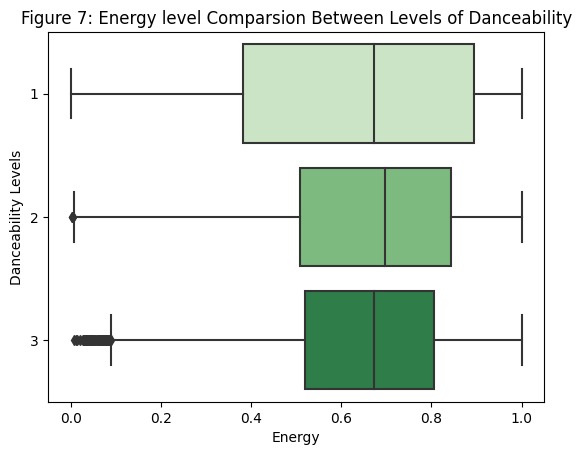

In [87]:
sns.boxplot(x='energy',y='dance_category', data=spotify_clean,palette="Greens")
plt.xlabel('Energy')
plt.ylabel('Danceability Levels')
plt.title('Figure 7: Energy level Comparsion Between Levels of Danceability');

In [88]:
#mean energy of each level
spotify_clean.groupby(by='dance_category')['energy'].mean()

dance_category
1    0.619090
2    0.660881
3    0.650728
Name: energy, dtype: float64

In [89]:
pingouin.pairwise_tests(data=spotify_clean, dv='energy', between='dance_category', padjust='bonf', alpha=0.2)

Contrast  A  B  Paired  ...        p-corr  p-adjust       BF10    hedges
0  dance_category  1  2   False  ...  6.418841e-84      bonf  1.966e+80 -0.153078
1  dance_category  1  3   False  ...  9.751776e-55      bonf  1.504e+51 -0.118635
2  dance_category  2  3   False  ...  3.226508e-06      bonf   1643.456  0.048749

[3 rows x 13 columns]

**Table 5**: Pairwise test of energy between Danceability levels 

Table shows the calculation the statics test which can be used to compare to the alpha level at 0.2 to determine whether the difference between group is significant. in case of energy elevel, the differnce is significant;however, the cut between group 2 and 3 are quite close with a slight decrease in energy. 

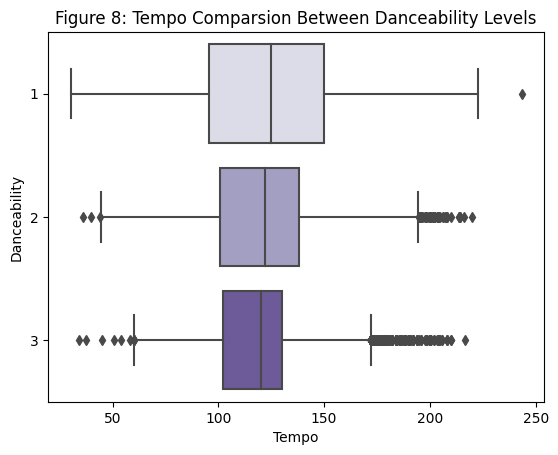

In [90]:
sns.boxplot(x='tempo',y='dance_category',data=spotify_clean,palette="Purples")
plt.xlabel('Tempo')
plt.ylabel('Danceability')
plt.title('Figure 8: Tempo Comparsion Between Danceability Levels');

In [91]:
#mean tempo between levels 
spotify_clean.groupby(by='dance_category')['tempo'].mean()

dance_category
1    124.564573
2    121.874315
3    118.845265
Name: tempo, dtype: float64

In [92]:
pingouin.pairwise_tests(data=spotify_clean, dv='tempo', between='dance_category', padjust='bonf')

Contrast  A  B  Paired  ...         p-corr  p-adjust        BF10    hedges
0  dance_category  1  2   False  ...   8.265112e-26      bonf   2.633e+22  0.084892
1  dance_category  1  3   False  ...  3.633574e-137      bonf  2.639e+133  0.188141
2  dance_category  2  3   False  ...   7.619912e-35      bonf   2.778e+31  0.124079

[3 rows x 13 columns]

**Table 6**: Pairwise Test of Tempo between Danceability levels 

compare to the signifcance level alpha at 0.2, the difference between levels are significant. and tempo is lower in tracks with higher danceablity scores.

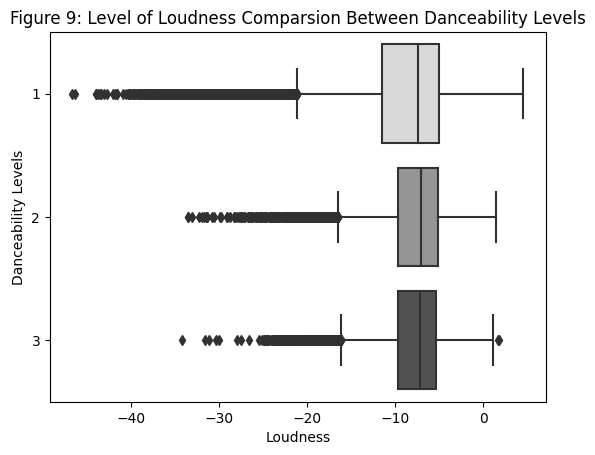

In [93]:
sns.boxplot(x='loudness',y='dance_category', data=spotify_clean, palette='Greys')
plt.xlabel('Loudness')
plt.ylabel('Danceability Levels')
plt.title('Figure 9: Level of Loudness Comparsion Between Danceability Levels');

In [94]:
#mean loudness between levels 
spotify_clean.groupby(by='dance_category')['loudness'].mean()

dance_category
1   -9.267244
2   -7.775780
3   -7.787840
Name: loudness, dtype: float64

In [95]:
pingouin.pairwise_tests(data=spotify_clean, dv='loudness', between='dance_category', padjust='bonf')

Contrast  A  B  Paired  ...         p-corr  p-adjust        BF10    hedges
0  dance_category  1  2   False  ...  3.457489e-282      bonf  2.064e+278 -0.266553
1  dance_category  1  3   False  ...  2.694226e-297      bonf  2.152e+293 -0.267661
2  dance_category  2  3   False  ...   1.000000e+00      bonf       0.012  0.003309

[3 rows x 13 columns]

**Table 7**: Pairewise Test of loudness between Danceability levels 

compare to significance level alpha at 0.2, the different between group 1 and 2, 1 and 3 are significant;however, between group 2 and 3 are no. and the genral trend is, as danceability increase, the loudness of the track increase as well (negative number is measure in decibel, the closer it is to 0, the louder the sound is) 

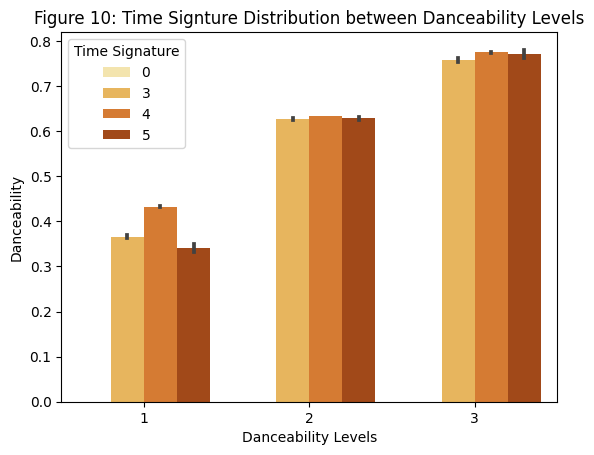

In [96]:
sns.barplot(x='dance_category', y='danceability',hue='time_signature',data=spotify_clean, palette='YlOrBr')
plt.xlabel('Danceability Levels')
plt.ylabel('Danceability')
plt.legend(title='Time Signature',loc='upper left', fontsize=10)
plt.title('Figure 10: Time Signture Distribution between Danceability Levels');

**Figure 10**:Time Signture Distribution between Danceability Levels

the distribution of time singuature between danceability levels is consistent. 

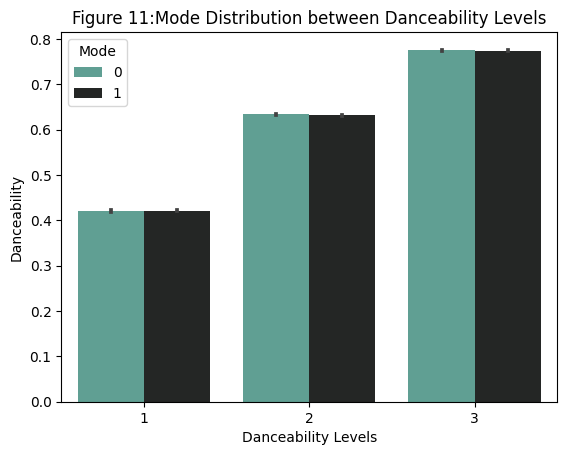

In [97]:
sns.barplot(x='dance_category', y='danceability', hue='mode',data=spotify_clean, palette="dark:#5A9_r")
plt.xlabel('Danceability Levels')
plt.ylabel('Danceability')
plt.legend(title='Mode',loc='upper left', fontsize=10)
plt.title('Figure 11:Mode Distribution between Danceability Levels');

**Figure 11**: Mode Distribution between Danceability Levels

no difference in mode between groups

# Section 3: Machine Learning Model 
In this section of the analysis, the main focus in build a good machine learning model that can predict a track's danceability with good accuracy when given the features.

**Target variable**: Danceability.

**Datatype**: continuous.

**Type of Problem**: Supervised Learning, Regression.

**Models to evaluate**:
- Linear regression
- Decison Tree Regression 

**Step 1:  Data Preprocess**
- used labencoder to encode the explicit to 0 for False, 1 for True. 
- separate numeric and categorical variables. 
- separeted dataset into training set, dev set, and test set. 
- used StandardScaler to transformed numeric to all have mean 0 with unit variant. 
- append transformed numeric data with categorical data as the dataset for train, tune and test.
 

**Step 2: Build and Train the Model**
- used the training set to train Linear Regression Model and Decision Tree Regression Model. 
- used Grid serch CV in Decision Tree Regression model to find the best hyperparameter _**(this part of code takes a long to run, so it is of code is commented out ).**_


**Step 3: Evalues the model performance**
- use the trained model to perdict both the dev set and training set. 
- calculated the rsquared values and RMSE values in both training and dev set:
    - compare score between models to pick the best one. 
        - **decsion tree regression model has high Rsquared value and lower RMSE value some to linear regression model.**
    - exam if underfitting or overfiting occur: 
        - compare training set error vs dev set error: 0.812 (dev), 0.818(train): no issue of overfitting 
        - compare to Base model (training on less features, no hyperparameter tuning create a underfittng model ):
            - **no underfitting** here: high accuracy, less RMSE 
            - base decision model : Rsquared : 0.009, RMSE : 0.176
            - tuned decision tress regression : Rsquared: 0.812, RMSE: 0.077
            
- Decision tree Regression Model was chosen.
    - it has the best Rsquare score **dev set rsquared value: 0.812**. 
    - the difference in Rsqaured between training and dev set is very small, so no overfitting issue **training set error: 0.819**. 
- used the Decision Tree Regression Model predict the test set. 
- calcualte the score for test set : Rsquared **0.81.**  RMSE: **0.076**

In [98]:
#Improt relevant packages for ML model development and Evaluation 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

### Setting Train, Dev, and Test Sets

In [99]:
spotify_ml= spotify_clean.drop(['artists','track_name','danceability'], axis=1)
y = spotify_clean['danceability'].values.reshape(-1,1)
#encode categorical variables 
encoder = LabelEncoder()
spotify_ml['explicit']=encoder.fit_transform(spotify_ml['explicit'])

In [100]:
spotify_ml

index  popularity  duration_ms  ...    tempo  time_signature dance_category
0          0         5.0     135860.0  ...   84.997               4              3
1          1        41.0     138875.0  ...   84.997               4              3
2          2        55.0      38144.0  ...   93.937               3              2
3          3        60.0      57789.0  ...  182.148               4              3
4          4        58.0     202920.0  ...   80.902               4              3
...      ...         ...          ...  ...      ...             ...            ...
80387  80387        23.0     291400.0  ...   90.062               3              1
80388  80388        56.0     310133.0  ...  201.701               3              1
80389  80389        20.0     218733.0  ...  125.917               4              1
80390  80390        23.0     168137.0  ...  116.457               3              1
80391  80391        20.0     162549.0  ...  177.591               4              1

[80392 rows x 16 columns]

### Data Preprocessing

In [101]:
#create train, test splity 
X_train, X_test, y_train, y_test = train_test_split(spotify_ml, y, test_size = 0.25,random_state = 123, shuffle=True)
#creat dev and test set 
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size = 0.4,random_state = 123, shuffle=True)

#separate the numeric features and categorical features before transformation 
num_col=['popularity','duration_ms','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
X_train_num = X_train[num_col].values
X_train_cat = X_train.drop(num_col, axis=1)

X_dev_num = X_dev[num_col].values
X_dev_cat = X_dev.drop(num_col, axis=1)

X_test_num = X_test[num_col].values
X_test_cat = X_test.drop(num_col, axis=1)

#transform the numeric features in the dataset 
scaler = StandardScaler()
X_train_num_scaled= scaler.fit_transform(X_train_num)
X_dev_num_scaled=scaler.transform(X_dev_num)
X_test_num_scaled=scaler.transform(X_test_num)

#append transformed numeric features and categoric features together to form the transformed data for ML models 
X_train_tx = np.append(X_train_num_scaled, X_train_cat.drop('index', axis=1), axis = 1)
X_dev_tx = np.append(X_dev_num_scaled, X_dev_cat.drop('index', axis=1), axis = 1)
X_test_tx = np.append(X_test_num_scaled, X_test_cat.drop('index', axis=1), axis = 1)

In [102]:
print(type(X_train_tx),type( X_dev_tx), type(X_test_tx))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [103]:
print(X_train.shape, y_train.shape, X_dev.shape, y_dev.shape, X_test.shape, y_test.shape)

(60294, 16) (60294, 1) (12058, 16) (12058, 1) (8040, 16) (8040, 1)


In [104]:
#check shape of reappend dataset, ensure the shape is correct 
print(X_train_tx.shape, y_train.shape, X_dev_tx.shape, y_dev.shape, X_test_tx.shape, y_test.shape)

(60294, 15) (60294, 1) (12058, 15) (12058, 1) (8040, 15) (8040, 1)


### First ML Model : Linear Regression 

In [105]:
lr_model = LinearRegression()
lr_model.fit(X_train_tx, y_train);

### Second ML Model: Decision Tree Regression 

In [106]:
#commented out due long running time
#tuning Decision Tree Classifer Model 

#grid = {
    #'max_depth':[2,4,6,None],
    #'min_samples_split':[2,4,6],
    #'criterion':['squared_error','friedman_mse','absolute_error'], 
    #'max_features':['sqrt','log2',None] 
#}

#dt_model = DecisionTreeRegressor(random_state=8)
#dt_cv = GridSearchCV(dt_model, grid, cv = 3 )
#dt_cv.fit(X_train_tx, y_train)
#print(dt_cv.best_params_, dt_cv.best_score_);

{'criterion': 'squared_error', 'max_depth': 6, 'max_features': None, 'min_samples_split': 2} 0.8126517135906366


In [107]:
#instantiate a new decision tree regressor model based upbove optimization 
dtr_model = DecisionTreeRegressor(criterion='squared_error', max_depth= 6, max_features=None, min_samples_split=2,random_state=8)
dtr_model.fit(X_train_tx, y_train);

### Model Evaluation & Comparsion 

In [145]:
#evaluate Linear Regression Model 
lr_dev_prediction = lr_model.predict(X_dev_tx)
lr_score_dev= lr_model.score(X_dev_tx, y_dev)
lr_rmse_dev= mean_squared_error(y_dev, lr_dev_prediction, squared=False)
print(f"Linear Regression R square for Dev Set is : {lr_score_dev}")
print(f"Linear Regression Root Mean Squared Error for Dev Set is: {lr_rmse_dev}")

Linear Regression R square for Dev Set is : 0.7672244694121609
Linear Regression Root Mean Squared Error for Dev Set is: 0.08528957514615558


In [155]:
#evalue Decision Tree Regression Model
dtr_dev_prediction = dtr_model.predict(X_dev_tx)
dtr_score_dev = dtr_model.score(X_dev_tx, y_dev)
dtr_rmse_dev = mean_squared_error(y_dev, dtr_dev_prediction, squared = False)
print(f"Decsion Tree Regression Rsquared Value for Dev Set is: {dtr_score_dev}")
print(f"Decision Tree Regression RMSE for Dev Set is: {dtr_rmse_dev}")

Decsion Tree Regression Rsquared Value for Dev Set is: 0.8125448554831312
Decision Tree Regression RMSE for Dev Set is: 0.07653779921747521


In [141]:
dtr_train_prediction = dtr_model.predict(X_train_tx)
dtr_score_train = dtr_model.score(X_train_tx, y_train)
dtr_rmse_train = mean_squared_error(y_train, dtr_train_prediction, squared = False)
print(f"Decision Tree Regression Rsquared Value for Training set is: {dtr_score_train}")
print(f"Decision Tree Regression RMSE for training set is: {dtr_rmse_train}")

Decision Tree Regression Rsquared Value for Training set is: 0.8190276245747248
Decision Tree Regression RMSE for training set is: 0.07453535148429767


In [154]:
#develop a base model 
#half the training features and dev features
X_train_base =X_train_tx[:,0:9]
X_dev_base = X_dev_tx[:,0:9]
#train decision tree model with data with less features and no hyperparameter turning
dtr_base= DecisionTreeRegressor(random_state=10)
dtr_base.fit(X_train_base, y_train)
dtr_base_predict=dtr_base.predict(X_dev_base)
dtr_base_score=dtr_base.score(X_dev_base, y_dev)
dtr_base_rmse=mean_squared_error(y_dev, dtr_base_predict, squared=False)
print(f"Decision Tree Regreesion Based Model Rsquared Value is: {dtr_base_score}")
print(f"Decision Tree Regression Based Model RMSE value is: {dtr_base_rmse}")

Decision Tree Regreesion Based Model Rsquared Value is: 0.009100102073182459
Decision Tree Regression Based Model RMSE value is: 0.1759714368905639


### Test Model's Generalizability with Test Set 

In [112]:
dtr_test_prediction = dtr_model.predict(X_test_tx)
dtr_score_test = dtr_model.score(X_test_tx, y_test)
dtr_rmse_test = mean_squared_error(y_test, dtr_test_prediction, squared = False)
print(f"Decision Tree Regression Rsquared Value for test set is:{dtr_score_test}")
print(f"Decision Tree Regression RMSE for test set is:{dtr_rmse_test}")

Decision Tree Regression Rsquared Value for test set is:0.8122423936248911
Decision Tree Regression RMSE for test set is:0.0764791206854998


# Section 4: Recommended Playlist
Steps for create the final playlist:
- append the danceability prediction it's corresponding dataset (training, dev, and test).
- concatenate training, dev, test dataset together back to the original shape. 
- using preicted danceability, popularity, valance to filter the dataset: 
    Resoning:
    1. based on the target audience, the playlist with popular song, happy songs (high valence) as well as high danceability will more appealing to bigger populuation and fit the purpose of the party. 
    2. included popularity feature filters out songs for kids. 
- extract the index of the top 50 songs after filters. 
- use the index to pick songs from the orignal dataset (spotify_clean) to extract the name of the song track and the name of the artistis saved as the final recommended playlist. 
- the spot check shows: the final playlist's danceability and popularity are quite high with medium to high level of valence. - the sorting was done correctly. 
- **final recommended playlist is in Table 10**


In [113]:
X_train['danceability_predict']=dtr_train_prediction.reshape(-1,1)
X_dev['danceability_predict'] =dtr_dev_prediction.reshape(-1,1)
X_test['danceability_predict']=dtr_test_prediction.reshape(-1,1)

playlist_df = pd.concat([X_train, X_dev, X_test], axis=0)

In [114]:
#create the final playlist 
top_50=playlist_df.sort_values(by=['danceability_predict','popularity','valence'], ascending=[False,False, False]).iloc[0:50, :]

In [115]:
top_50

index  popularity  ...  dance_category  danceability_predict
61322  61322       100.0  ...               3              0.807111
8585    8585        93.0  ...               3              0.807111
42416  42416        90.5  ...               3              0.807111
7149    7149        90.0  ...               3              0.807111
19200  19200        88.0  ...               3              0.807111
21590  21590        88.0  ...               3              0.807111
53246  53246        88.0  ...               3              0.807111
21588  21588        87.0  ...               3              0.807111
77371  77371        87.0  ...               3              0.807111
31385  31385        87.0  ...               3              0.807111
20423  20423        86.0  ...               3              0.807111
21592  21592        86.0  ...               3              0.807111
7137    7137        86.0  ...               3              0.807111
8869    8869        86.0  ...               3              0.807111
76644  76644        85.0  ...               3              0.807111
24468  24468        85.0  ...               3              0.807111
52224  52224        84.0  ...               3              0.807111
27314  27314        84.0  ...               3              0.807111
7120    7120        84.0  ...               3              0.807111
7116    7116        84.0  ...               3              0.807111
78146  78146        84.0  ...               3              0.807111
76653  76653        84.0  ...               3              0.807111
19202  19202        84.0  ...               3              0.807111
5194    5194        84.0  ...               3              0.807111
71063  71063        84.0  ...               3              0.807111
44754  44754        83.0  ...               3              0.807111
7950    7950        83.0  ...               3              0.807111
15279  15279        83.0  ...               3              0.807111
7115    7115        83.0  ...               3              0.807111
10936  10936        83.0  ...               3              0.807111
76090  76090        83.0  ...               3              0.807111
37195  37195        83.0  ...               3              0.807111
38921  38921        83.0  ...               3              0.807111
37193  37193        83.0  ...               3              0.807111
7147    7147        83.0  ...               3              0.807111
7127    7127        82.0  ...               3              0.807111
43370  43370        82.0  ...               3              0.807111
16336  16336        82.0  ...               3              0.807111
24760  24760        82.0  ...               3              0.807111
894      894        82.0  ...               3              0.807111
5201    5201        82.0  ...               3              0.807111
17313  17313        82.0  ...               3              0.807111
37194  37194        82.0  ...               3              0.807111
12972  12972        82.0  ...               3              0.807111
19884  19884        82.0  ...               3              0.807111
32257  32257        82.0  ...               3              0.807111
34717  34717        81.0  ...               3              0.807111
58339  58339        81.0  ...               3              0.807111
46404  46404        81.0  ...               3              0.807111
5193    5193        81.0  ...               3              0.807111

[50 rows x 17 columns]

In [116]:
song_index = list(top_50['index'])
recommended_playlist = spotify_clean[spotify_clean['index'].isin(song_index)]

In [118]:
#ensure the final list match the song list predicted by the decision Tree regression model 
assert list(recommended_playlist['index']) == list(top_50['index'].sort_values())

In [126]:
#spot check 
recommended_playlist.head()

index                           artists  ... time_signature  dance_category
894     894  AP Dhillon;Gurinder Gill;Intense  ...              4               3
5193   5193                     Ariana Grande  ...              4               3
5194   5194                     Ariana Grande  ...              4               3
5201   5201                     Ariana Grande  ...              4               3
7115   7115                         Bad Bunny  ...              4               3

[5 rows x 19 columns]

In [131]:
#spot check 
recommended_playlist.drop('index', axis=1).describe()

popularity    duration_ms  ...    valence       tempo
count   50.000000      50.000000  ...  50.000000   50.000000
mean    84.490000  206920.930000  ...   0.579010  112.824390
std      3.458928   52101.336262  ...   0.210339   14.226289
min     81.000000   95466.000000  ...   0.183000   93.987000
25%     82.000000  174139.000000  ...   0.424500  101.241750
50%     83.500000  201626.000000  ...   0.567000  111.108000
75%     86.000000  232166.000000  ...   0.740750  122.792000
max    100.000000  350320.000000  ...   0.952000  140.048000

[8 rows x 11 columns]

In [130]:
# the complete recommendation playlist 
print(recommended_playlist[['artists','track_name']].reset_index(drop=True))

                                              artists                                  track_name
0                    AP Dhillon;Gurinder Gill;Intense                                     Excuses
1                                       Ariana Grande                                       34+35
2                                       Ariana Grande                                     7 rings
3                                       Ariana Grande                               thank u, next
4                                           Bad Bunny                                      Agosto
5                                           Bad Bunny                                    Aguacero
6                                           Bad Bunny                           Enséñame a Bailar
7                                           Bad Bunny                            Si Veo a Tu Mamá
8                                Bad Bunny;Buscabulla                                      Andrea
9   Bad Bunny;Ozuna;

## **Table 10** : Recommended Playlist of the party

In this table, contains 50 songs and the name of artistis for the dance party. 


# Additional Section 

In [120]:
# number of unique track genres in the dataframe 
print(spotify['track_genre'].nunique())
# list of unique track geners in the dataframe 
print(spotify['track_genre'].unique())

114
['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' '

In [121]:
fit = np.polyfit(spotify_clean['loudness'], spotify_clean['energy'], 3)
equation = np.poly1d(fit)
print(equation)

            3             2
-2.067e-06 x + 0.0009529 x + 0.06478 x + 1.091


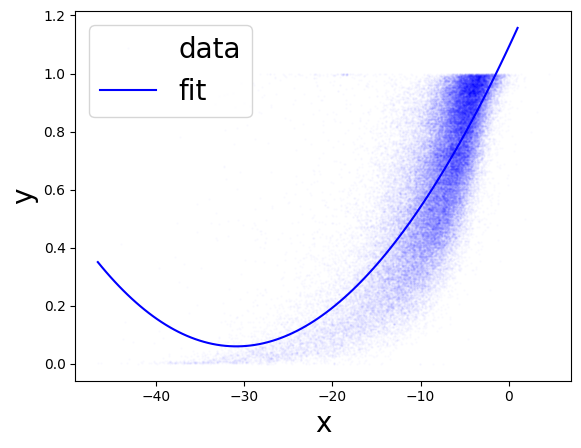

In [122]:
xmesh = np.linspace(min(spotify_clean['loudness']), max(spotify_clean['energy']), 100)
plt.plot(spotify_clean['loudness'], spotify_clean['energy'], 'bo', label='data', alpha=0.01, markersize=1)
plt.plot(xmesh, equation(xmesh), '-b', label='fit')
plt.legend(fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.show()

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                            |
|---------|----------|---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul>|
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul>|
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!